In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set()

# 1) Selección del dataset de trabajo:

Se seleccionó la ciudad de **Vancouve**, **Canada**

In [3]:
listings = pd.read_csv(
    "http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/data/listings.csv.gz"
)
# calendar = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/data/calendar.csv.gz")
# reviews = pd.read_csv("http://data.insideairbnb.com/canada/bc/vancouver/2023-06-10/data/reviews.csv.gz")

Resumen de variables:

In [4]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.355000e+03,6.355000e+03,6.355000e+03,6355.000000,6355.000000,0.0,6355.000000,6355.000000,6355.000000,0.0,5037.000000,6313.000000,6355.000000,6355.000000,6355.000000,6355.000000,6.355000e+03,6.355000e+03,6355.000000,6.355000e+03,0.0,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,6355.000000,5248.000000,5234.000000,5235.000000,5234.000000,5234.000000,5233.000000,5234.000000,6355.000000,6355.000000,6355.000000,6355.000000,5248.000000
mean,3.288925e+17,2.023061e+13,1.747044e+08,10.940677,17.343037,NaN,49.263141,-123.112591,3.559717,NaN,1.782410,1.941232,16.147600,533.562864,15.298505,17.491739,6.765650e+05,6.765802e+05,16.665130,6.765765e+05,NaN,6.501338,15.928403,28.904642,133.116601,38.722738,13.159402,1.403934,4.766157,4.811015,4.760082,4.849973,4.863300,4.833113,4.677298,6.200944,5.472227,0.712667,0.014162,1.773710
std,3.807700e+17,0.000000e+00,1.695789e+08,41.424217,56.568963,NaN,0.020564,0.038044,2.066112,NaN,1.030273,1.191382,31.905929,458.632852,30.547694,35.530217,3.809367e+07,3.809367e+07,32.117101,3.809367e+07,NaN,8.487013,17.536618,27.164638,118.588650,69.252692,20.025863,2.165490,0.433505,0.355142,0.400321,0.306904,0.326036,0.271575,0.390580,16.311660,16.332417,1.950010,0.176849,1.832335
min,1.318800e+04,2.023061e+13,6.033000e+03,1.000000,1.000000,NaN,49.202960,-123.221859,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.898755e+07,2.023061e+13,2.260310e+07,1.000000,1.000000,NaN,49.251027,-123.131027,2.000000,NaN,1.000000,1.000000,2.000000,90.000000,1.000000,2.000000,3.650000e+02,3.650000e+02,2.000000,3.650000e+02,NaN,0.000000,0.000000,4.000000,27.000000,2.000000,0.000000,0.000000,4.720000,4.780000,4.710000,4.810000,4.860000,4.780000,4.600000,1.000000,1.000000,0.000000,0.000000,0.320000
50%,5.119770e+07,2.023061e+13,1.137402e+08,2.000000,3.000000,NaN,49.269439,-123.115937,3.000000,NaN,2.000000,2.000000,3.000000,365.000000,3.000000,4.000000,1.125000e+03,1.125000e+03,3.400000,1.125000e+03,NaN,3.000000,9.000000,22.000000,97.000000,11.000000,3.000000,0.000000,4.880000,4.910000,4.880000,4.940000,4.960000,4.910000,4.760000,1.000000,1.000000,0.000000,0.000000,1.030000
75%,7.376943e+17,2.023061e+13,2.975667e+08,4.000000,7.000000,NaN,49.279076,-123.090590,4.000000,NaN,2.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1.125000e+03,1.125000e+03,30.000000,1.125000e+03,NaN,9.000000,25.000000,48.000000,244.000000,46.000000,19.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.890000,3.000000,2.000000,0.000000,0.000000,2.830000
max,9.095784e+17,2.023061e+13,5.186788e+08,463.000000,557.000000,NaN,49.294360,-123.023680,16.000000,NaN,13.000000,13.000000,900.000000,1125.000000,730.000000,900.000000,2.147484e+09,2.147484e+09,784.100000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,888.000000,147.000000,16.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,112.000000,112.000000,17.000000,4.000000,17.270000


In [5]:
listings.describe(exclude="number")

,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,6355,6355,6355,6355,6334,4221,6355,6355,6355,6355,5042,3495,5199,5199,5391,5170,6355,6355,6021,6355,6355,6355,4221,6355,6355,6355,6354,6355,6355,6355,6355,5248,5248,3884,6355
unique,6355,1,2,2745,6128,3734,6230,4330,2329,2686,111,2303,4,53,82,2,4249,4249,85,6,2,2,9,23,53,4,28,6186,699,2,1,2121,885,3390,2
top,https://www.airbnb.com/rooms/13188,2023-06-10,city scrape,Rental unit in Vancouver · 1 bedroom · 1 bed ·...,The suite way to stay in downtown Vancouver. E...,The West End is a neighbourhood in Downtown Va...,https://a0.muscache.com/pictures/78e62be7-b673...,https://www.airbnb.com/users/show/227662329,Jordan,2018-11-26,"Vancouver, Canada","My name is Jordan, I am a junior hockey player...",within an hour,100%,100%,f,https://a0.muscache.com/defaults/user_pic-50x5...,https://a0.muscache.com/defaults/user_pic-225x...,Central Vancouver,"['email', 'phone']",t,t,"Vancouver, British Columbia, Canada",Downtown,Entire condo,Entire home/apt,1 bath,"[""Paid dryer \u2013 In building"", ""Free parkin...",$150.00,t,2023-06-10,2022-07-31,2023-06-04,Exempt,f
freq,1,6355,5145,175,12,28,6,112,126,114,4465,112,3870,4295,2445,3194,113,113,1335,4856,6242,5918,4211,1711,1443,5207,3610,9,156,6282,6355,25,283,274,4794


De las tablas anteriores junto con el diccionario de datos:

1) Que probablemente no son útiles para el análisis por su relación con el negocio o por su alta cardinalidad que implicaría utilizar técnicas diferentes para su análisis:

    - listing_url
    - last_scraped
    - source
    - name
    - description
    - neighborhood_overview
    - picture_url
    - host_url
    - host_name
    - host_since
    - host_location
    - host_about
    - host_thumbnail_url
    - host_picture_url
    - host_neighbourhood
    - 
3) 
se identifican algunas varibales codificadas incorrctamente, por lo que se procede a hacer algunas correciones:

*host_response_rate*

In [6]:
listings["host_response_rate"].unique()

array(['100%', nan, '0%', '90%', '63%', '56%', '50%', '55%', '80%', '83%',
       '93%', '75%', '97%', '60%', '73%', '70%', '25%', '88%', '38%',
       '86%', '89%', '91%', '64%', '98%', '44%', '67%', '92%', '78%',
       '79%', '94%', '40%', '37%', '33%', '96%', '20%', '85%', '10%',
       '95%', '17%', '99%', '30%', '74%', '71%', '57%', '29%', '52%',
       '14%', '65%', '59%', '68%', '84%', '18%', '53%', '32%'],
      dtype=object)

In [7]:
listings["host_response_rate_adjusted"] = (
    listings["host_response_rate"].str.replace("%", "").astype("float").divide(100)
)

listings["host_response_rate_adjusted"]

0       1.00
1       1.00
2       1.00
3        NaN
4       1.00
        ... 
6350    0.96
6351     NaN
6352    1.00
6353     NaN
6354    1.00
Name: host_response_rate_adjusted, Length: 6355, dtype: float64

*price*

In [8]:
listings["price"].apply(list).explode().value_counts()

0    15366
$     6355
.     6355
1     3478
2     2648
5     1992
3     1544
9     1529
4     1235
6     1083
8     1033
7      964
,       86
Name: price, dtype: int64

In [9]:
listings["price_asjusted"] = (
    listings["price"].str.replace("[$,]", "", regex=True).astype("float")
)

In [10]:
listings["price_asjusted"].describe()

count     6355.000000
mean       250.515972
std        571.811061
min         14.000000
25%        120.000000
50%        179.000000
75%        275.000000
max      28386.000000
Name: price_asjusted, dtype: float64

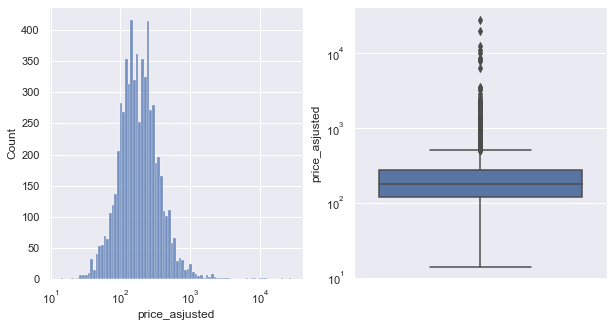

In [73]:
# listings["price_asjusted"].apply(np.log).hist()

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(listings, x="price_asjusted", log_scale=True, ax=ax1)
g = sns.boxplot(listings, y="price_asjusted", ax=ax2)
ax2.set_yscale("log")

<AxesSubplot: >

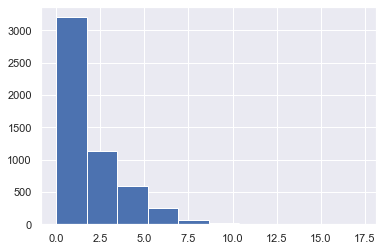

In [15]:
listings["reviews_per_month"].hist()

*bathrooms_text*

In [22]:
listings[["bathrooms", "bathrooms_text"]].drop_duplicates()

0                  1 bath
7                 3 baths
9          1 private bath
10          1 shared bath
14                2 baths
27              1.5 baths
37              3.5 baths
107             2.5 baths
230             4.5 baths
244        2 shared baths
338               4 baths
470      1.5 shared baths
485               0 baths
848      2.5 shared baths
898               6 baths
1669              5 baths
1875            5.5 baths
1991    Private half-bath
2317              8 baths
2360       3 shared baths
2421       0 shared baths
2752     Shared half-bath
3025                  NaN
3044            6.5 baths
3982              7 baths
4032       4 shared baths
4078             10 baths
5913            Half-bath
5938              9 baths
Name: bathrooms_text, dtype: object

In [44]:
listings["bathrooms"] = (
    listings["bathrooms_text"]
    .str.replace("(?i)half-bath", "1.5", regex=True)
    .str.replace(r"[^\d.]", "", regex=True)
    .astype("float")
)

<AxesSubplot: >

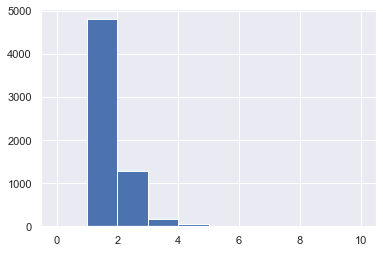

In [48]:
listings["bathrooms"].hist()

In [27]:
listings["shared_bathrooms"] = listings["bathrooms_text"].str.contains("shared")

<AxesSubplot: xlabel='shared_bathrooms', ylabel='count'>

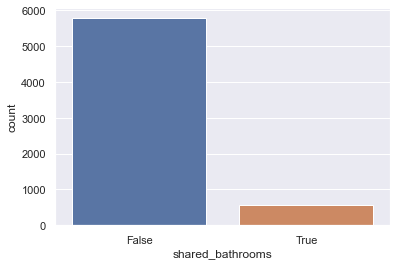

In [29]:
sns.countplot(listings, x="shared_bathrooms")

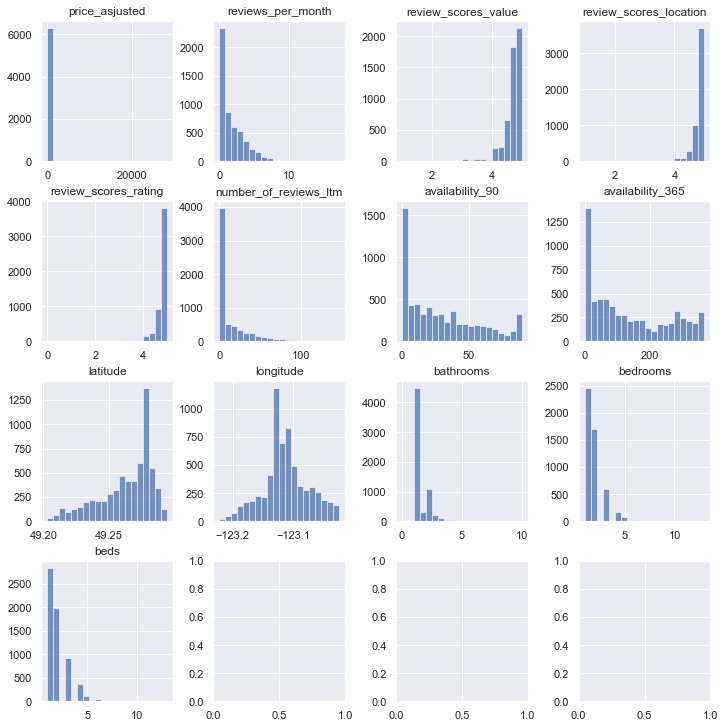

In [80]:
cuantitativas_de_interés = [
    "price_asjusted",
    "reviews_per_month",
    "review_scores_value",
    "review_scores_location",
    "review_scores_rating",
    "number_of_reviews_ltm",
    "availability_90",
    "availability_365",
    "latitude",
    "longitude",
    "bathrooms",
    "bedrooms",
    "beds",
]

_, axes = plt.subplots(4, 4, figsize=(10, 10), layout="constrained")

for col, ax in zip(cuantitativas_de_interés, axes.flat):
    listings[cuantitativas_de_interés]
    sns.histplot(listings, x=col, ax=ax, bins=20)
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

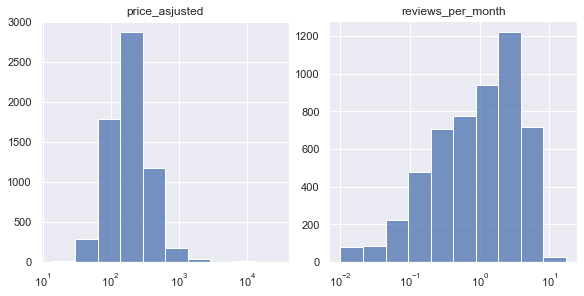

In [78]:
cuantitativas_de_interés = [
    "price_asjusted",
    "reviews_per_month",
]

_, axes = plt.subplots(1, 2, figsize=(8, 4), layout="constrained")

for col, ax in zip(cuantitativas_de_interés, axes.flat):
    sns.histplot(listings, x=col, ax=ax, log_scale=True, bins=10)
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

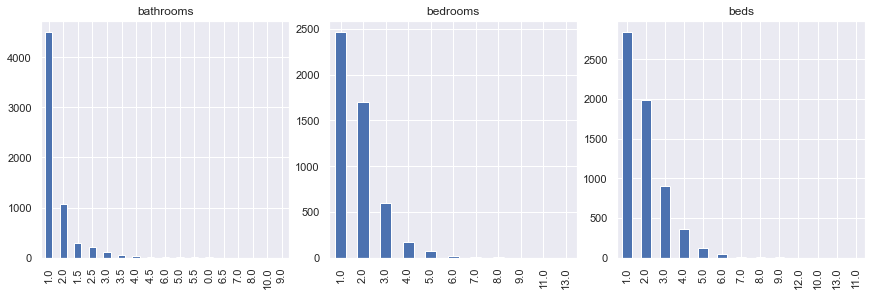

In [88]:
cuantitativas_de_interés = [
    "bathrooms",
    "bedrooms",
    "beds",
]

_, axes = plt.subplots(1, 3, figsize=(12, 4), layout="constrained")

for col, ax in zip(cuantitativas_de_interés, axes.flat):
    listings[cuantitativas_de_interés]
    listings[col].value_counts().plot.bar(ax=ax)
    ax.set_title(col)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

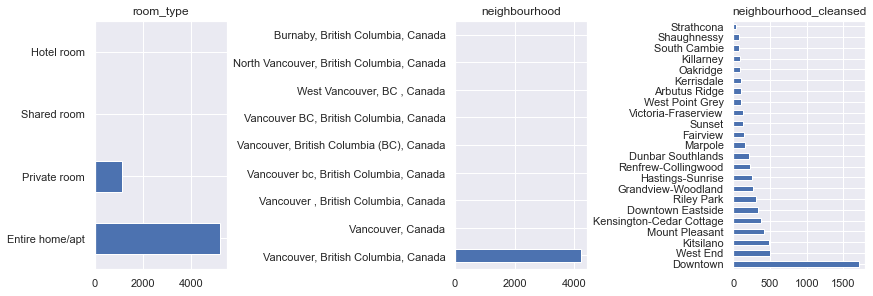

In [120]:
categorical = [
    "room_type",
    # "property_type",
    "neighbourhood",
    "neighbourhood_cleansed",
]

_, axes = plt.subplots(1, 3, figsize=(12, 4), layout="constrained")

for ax, col in zip(axes.flat, categorical):
    listings[col].value_counts().plot.barh(ax=ax)
    ax.set_title(col)

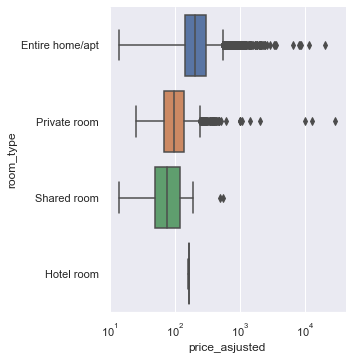

In [126]:
g = sns.catplot(listings, y="room_type", x="price_asjusted", kind="box")

g.ax.set_xscale("log")

In [ ]:
g = sns.catplot(listings, y="room_type", x="price_asjusted", kind="box")

g.ax.set_xscale("log")

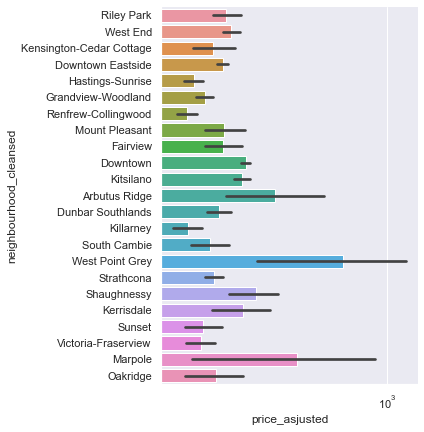

In [135]:
g = sns.catplot(
    listings, y="neighbourhood_cleansed", x="price_asjusted", kind="bar", height=6
)

g.ax.set_xscale("log")

In [19]:
listings[
    [
        "reviews_per_month",
        "review_scores_value",
        "review_scores_location",
        "review_scores_rating",
        "number_of_reviews_ltm",
        "availability_90",
        "availability_365",
        "price",
        "amenities",
        "bathrooms",
        "bathrooms_text",
        "bedrooms",
        "beds",
        "room_type",
        "property_type",
        "latitude",
        "longitude",
        "neighbourhood",
        "neighbourhood_cleansed",
        "neighbourhood_group_cleansed",
    ]
]

,reviews_per_month,review_scores_value,review_scores_location,review_scores_rating,number_of_reviews_ltm,availability_90,availability_365,price,amenities,bathrooms,bathrooms_text,bedrooms,beds,room_type,property_type,latitude,longitude,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
0,1.61,4.80,4.88,4.83,4,3,150,$150.00,"[""Portable fans"", ""Refrigerator"", ""TV with sta...",NaN,1 bath,NaN,2.0,Entire home/apt,Entire rental unit,49.247730,-123.105090,"Vancouver, British Columbia, Canada",Riley Park,NaN
1,2.88,4.67,4.92,4.68,19,14,247,$227.00,"[""Dishwasher"", ""Free washer \u2013 In building...",NaN,1 bath,1.0,1.0,Entire home/apt,Entire condo,49.282010,-123.126690,NaN,West End,NaN
2,0.67,4.89,4.78,4.92,5,5,121,$150.00,"[""Dishwasher"", ""Lake view"", ""Window guards"", ""...",NaN,1 bath,1.0,1.0,Entire home/apt,Entire rental unit,49.256220,-123.066070,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,NaN
3,0.22,4.71,4.77,4.76,0,0,0,$150.00,"[""Refrigerator"", ""Fire extinguisher"", ""Heating...",NaN,1 bath,1.0,2.0,Entire home/apt,Entire home,49.249220,-123.081390,"Vancouver, British Columbia, Canada",Kensington-Cedar Cottage,NaN
4,1.64,4.74,4.60,4.69,7,8,187,$134.00,"[""Dishwasher"", ""Portable fans"", ""Refrigerator""...",NaN,1 bath,1.0,1.0,Entire home/apt,Entire guest suite,49.279210,-123.088350,NaN,Downtown Eastside,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6350,NaN,NaN,NaN,NaN,0,90,364,$500.00,"[""Paid parking on premises"", ""TV"", ""Free parki...",NaN,2 baths,2.0,2.0,Entire home/apt,Entire rental unit,49.275740,-123.115920,NaN,Downtown,NaN
6351,NaN,NaN,NaN,NaN,0,90,179,$44.00,"[""TV"", ""Free parking on premises"", ""Fire extin...",NaN,1 bath,1.0,1.0,Private room,Private room in home,49.239280,-123.149150,NaN,Shaughnessy,NaN
6352,NaN,NaN,NaN,NaN,0,90,363,$82.00,"[""Dishwasher"", ""Refrigerator"", ""Heating"", ""Fre...",NaN,1 bath,1.0,1.0,Entire home/apt,Entire rental unit,49.266040,-123.097260,"Vancouver, British Columbia, Canada",Mount Pleasant,NaN
6353,NaN,NaN,NaN,NaN,0,68,106,$45.00,"[""Shampoo"", ""Free parking on premises"", ""First...",NaN,1 bath,1.0,1.0,Private room,Private room in home,49.230884,-123.163359,NaN,Kerrisdale,NaN
